<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [26]:
# Importing libraries
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
# !pip install streamlit

In [3]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
     |████████████████████████████████| 6.5 MB 43.0 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 50.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from transformers import pipeline

In [5]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b5887283689c40cba8cc6679fab9b84701fa547bb6b2f036f17297d798e8e8e3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [41]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')

In [8]:
xls.sheet_names

['Concepts']

In [9]:
# Reading the data as pandas dataframe
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [10]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,Python language was created in 1991\n\nLike an...,There are 32 keywords in C++ and 35 keywords i...,"data types (Numeric, Boolean, String, Datetime)","Integers or whole numbers (1,2,-5,1000), Float...","Arithmatic Operation (addition[+], subtraction...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name (must start with letter or under...,Boolean Variable (true or false)\n\nComparison...,"Perfect number, a positive integer that is equ...",...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,What is the order of precedence in python?\n\n...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,NaN,NaN
1,"a word, a phrase, a sentence, a paragraph or a...","sequence, indexing","string' or ""string"" \n\ndouble quotes are used...",print('Use \n to print a new line'),string indexing begins from 0,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",string[:] If you do not specify the starting ...,"slicing with step size, string[3:14:2] means f...",str' object does not support item assignment m...,...,"String functions, print(), type(), len()\n\nor...","String methods \n\nstring.lower(), string.uppe...",first_name = 'Rahul'\nlast_name = 'Modi'\n\nfu...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,for color print\n\nfrom termcolor import color...,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [12]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Concept-1   99 non-null     object
 1   Concept-2   94 non-null     object
 2   Concept-3   94 non-null     object
 3   Concept-4   92 non-null     object
 4   Concept-5   92 non-null     object
 5   Concept-6   88 non-null     object
 6   Concept-7   87 non-null     object
 7   Concept-8   86 non-null     object
 8   Concept-9   83 non-null     object
 9   Concept-10  79 non-null     object
 10  Concept-11  76 non-null     object
 11  Concept-12  71 non-null     object
 12  Concept-13  65 non-null     object
 13  Concept-14  59 non-null     object
 14  Concept-15  54 non-null     object
 15  Concept-16  44 non-null     object
 16  Concept-17  40 non-null     object
 17  Concept-18  37 non-null     object
 18  Concept-19  30 non-null     object
 19  Concept-20  22 non-null     object
dtypes: object(20

## **4. Cleaning and Preparation of Text Documents**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

In [11]:
data_science_df.drop('Unnamed: 20', axis=1, inplace=True)

In [13]:
# Imputation of null values with null string
data_science_df=data_science_df.fillna("")

In [14]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Concept-1   99 non-null     object
 1   Concept-2   99 non-null     object
 2   Concept-3   99 non-null     object
 3   Concept-4   99 non-null     object
 4   Concept-5   99 non-null     object
 5   Concept-6   99 non-null     object
 6   Concept-7   99 non-null     object
 7   Concept-8   99 non-null     object
 8   Concept-9   99 non-null     object
 9   Concept-10  99 non-null     object
 10  Concept-11  99 non-null     object
 11  Concept-12  99 non-null     object
 12  Concept-13  99 non-null     object
 13  Concept-14  99 non-null     object
 14  Concept-15  99 non-null     object
 15  Concept-16  99 non-null     object
 16  Concept-17  99 non-null     object
 17  Concept-18  99 non-null     object
 18  Concept-19  99 non-null     object
 19  Concept-20  99 non-null     object
dtypes: object(20

In [16]:
# Creating documents combining all the concepts columns
data_science_df['documents']=['' for k in range(99)]
for k in data_science_df.index:
  data_science_df['documents'][k]=''.join(list(data_science_df.iloc[k].values))

In [17]:
data_science_df['documents']

0     Python language was created in 1991\n\nLike an...
1     a word, a phrase, a sentence, a paragraph or a...
2     List is a data structure to store multiple ite...
3     These are data structures to store multiple it...
4     Instructions that a Python interpreter can exe...
                            ...                        
94    Difference between image classification and ob...
95    Face Verification \n\n> Input image, name/ID\n...
96    Examples of Models with sequence data\n\n1. Sp...
97    NLP and Word Embedding\n\n> Embedding and enco...
98    Sequence to sequence model\n\n1. Machine trans...
Name: documents, Length: 99, dtype: object

## **5. Preparation of Input Data**

Text Pre-processing

First we develop a list of the top words used across the documents, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [30]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

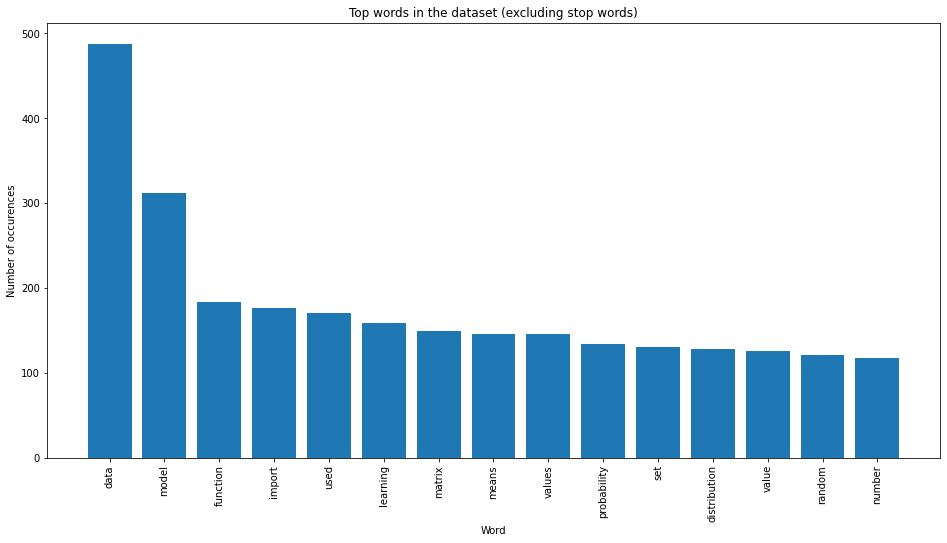

In [31]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [36]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
text_sample = data_science_df['documents'].sample(n=99, random_state=0).values

print('Document before vectorization: {}'.format(text_sample[10]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[10]))

Document before vectorization: Feature engineering is a process of transforming the given data into a form which is easier to interpret.

We define feature engineering as creating new features from our existing ones to improve model performance.Why Feature Engineering?

The intention of feature engineering is to achieve two primary goals:

1. Preparing an input dataset that is compatible with and best fits the machine learning algorithm.

2. Improving the performance of machine learning modelsBasic EDA

1. Univariate Analysis

Ex:- CDF, PDF, Box plot, Violin plot.

2.  Bivariate analysis

Ex:- Box plot, Scatter Plot,Violin plot, Joint plot.

3. Multivariate Analysis

Ex:- Pair Plot, 3D Scatter Plot.Imputing the missing values with mean/mode/medianOutliers are actually exceptional or abnormal experience

> Finding out the true outlier experiences is very important

> In univariate or bivariate analysis of box plot, an observation may become outlier. There may be some other feature which

In [ ]:
# Convert to list
data = data_science_df['documents'].values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

Tokenize and Clean-up using gensim’s simple_preprocess()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['python', 'language', 'was', 'created', 'in', 'like', 'any', 'other', 'computer', 'programming', 'language', 'python', 'tokens', 'smallest', 'meaningful', 'part', 'of', 'any', 'statement', 'expression', 'or', 'command', 'are', 'keywords', 'basic', 'words', 'of', 'any', 'language', 'identifiers', 'programmer', 'defined', 'words', 'of', 'any', 'program', 'literals', 'data', 'or', 'data', 'structure', 'punctuations', 'etc', 'operators', 'there', 'are', 'keywords', 'in', 'and', 'keywords', 'in', 'python', 'python', 'keywords', 'false', 'await', 'else', 'import', 'pass', 'none', 'break', 'except', 'in', 'raise', 'true', 'class', 'finally', 'is', 'return', 'and', 'continue', 'for', 'lambda', 'try', 'as', 'def', 'from', 'nonlocal', 'while', 'assert', 'del', 'global', 'not', 'with', 'async', 'elif', 'if', 'or', 'yield', 'data', 'types', 'numeric', 'boolean', 'string', 'datetime', 'integers', 'or', 'whole', 'numbers', 'floats', 'or', 'real', 'numbers', 'or', 'and', 'complex', 'numbers', 'call

Lemmatization

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

['create other computer programming language python token small meaningful part statement expression command keywords basic word language identifier programmer define word program literal datum datum structure punctuation operator keyword false else import none break raise true class finally return continue lambda try nonlocal assert async elif yield data type numeric boolean string datetime integer whole number float real number complex number call scientific notation mean arithmatic operation addition remainder mathematic computer science floor function function take as input real number give output great integer less equal denote floor similarly ceiling function map least integer great equal denote ceil variable store place computer memory datum integer float stre datetime datum structure list tuple set data datum structure can change variedvariable name must start letter underscore variable name datum variable name datum structure good naming practice case_sensitive different varia

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Create the Document-Word matrix

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

Check the Sparsicity

In [ ]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  19.612022364315944 %


# **Building of Topic Model**

Building LDA model with sklearn and hyperparameter tuning

In [37]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [39]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(document_term_matrix))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Model Perplexity:  1693.31850136305


Let's visualize the LDA model with pyLDAvis

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

Let's see the dominant topic in each document

In [45]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.000000,0.000000,0.000000,1.000000,0.000000,3
Doc1,0.000000,0.000000,1.000000,0.000000,0.000000,2
Doc2,0.370000,0.620000,0.000000,0.000000,0.000000,1
Doc3,0.000000,0.000000,1.000000,0.000000,0.000000,2
Doc4,0.000000,0.000000,0.000000,1.000000,0.000000,3
Doc5,0.000000,0.000000,0.000000,1.000000,0.000000,3
Doc6,0.340000,0.290000,0.000000,0.000000,0.370000,4
Doc7,0.000000,0.000000,0.410000,0.590000,0.000000,3
Doc8,0.000000,0.000000,1.000000,0.000000,0.000000,2
Doc9,1.000000,0.000000,0.000000,0.000000,0.000000,0


Review topics distribution across documents

In [46]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,28
1,0,20
2,3,19
3,4,19
4,1,13


Let's see the Topic’s keywords

In [48]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,001,01,01z,025,0253,03,05,05critical,...,λi,λt,λv,λx,μ1,μ2,σ1,σ2,σp,χ2
Topic0,0.2,0.200000,1.195792,3.198836,1.19818,0.2,0.2,0.2,0.200000,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200505,0.2,0.2
Topic1,5.2,0.200000,0.200000,7.200103,0.20000,0.2,0.2,1.2,0.200000,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2
Topic2,0.2,5.200023,0.204207,0.201145,0.20182,0.2,0.2,0.2,0.200039,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2
Topic3,0.2,0.200000,0.200000,1.199916,0.20000,0.2,0.2,0.2,1.199900,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2
Topic4,0.2,2.199976,0.200000,0.200000,0.20000,3.2,1.2,0.2,5.200060,1.2,...,2.2,2.2,1.2,2.2,3.2,3.2,5.2,6.199495,2.2,2.2


Get the top 15 keywords each topic

In [53]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=5):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=5)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4
Topic 0,model,data,learning,np,import
Topic 1,data,table,my_df,column,plot
Topic 2,data,model,regression,learning,import
Topic 3,vector,file,python,used,docker
Topic 4,probability,random,distribution,data,matrix


# **Building of Question-Answering Model**

In [18]:
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [19]:
context = 'By default, it will return a single output of max_length provided. However, we can set the num_return_sequences parameter to output as many sequences as we want. To learn how to build a Text generation model using LSTM, check out the Github repository. Now let’s build our last Pipeline for the question-answering task.'

In [24]:
question="what is Github?"

In [25]:
ans = ques_ans_pipeline(question=question, context=context)
print(f"The answer is: {ans['answer']}")

The answer is: repository


In [ ]:
# from transformers import BertForQuestionAnswering, AutoTokenizer

# modelname = 'deepset/bert-base-cased-squad2'

# model = BertForQuestionAnswering.from_pretrained(modelname)
# tokenizer = AutoTokenizer.from_pretrained(modelname)

In [ ]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])

# **Conclusion**